In [1]:
%load_ext autoreload
%autoreload 1
%aimport evaluator
%aimport quantized_model9s

import h5py
import numpy as np
from evaluator import evaluate_dataset_helper
from quantized_model9s import CNN
import tqdm


recalls = []
precisions = []
position_mae = []
height_mae = []
height_std_mae = []
bits = []

for bitcount in range(12,3,-1):
    bits.append( bitcount )
    cnn = CNN( "data/last_model9_tf2_pruned.h5", nbits=bitcount )

    TESTSIZE=10000
    with h5py.File('data/test_100k_64.h5', 'r') as f:
        x_test = np.array(f['x'])
        y_test = np.array( f["y"][:TESTSIZE,...] )
        y_pred = []
        for ii in tqdm.trange(TESTSIZE):

            x = x_test[ii,...]
            y_pred.append(cnn(x, quantize=True))

        y_pred = np.array( y_pred )

        (accuracy, pos_mean, pos_std, h_mean, h_std, precision, recall) = evaluate_dataset_helper( y_pred, y_test, dc_threshold=0.8, drawplots=False, verbose=False )
        
        recalls.append( recall )
        precisions.append( precision )
        position_mae.append( np.abs(pos_mean) )
        height_mae.append( np.abs(h_mean) )
        height_std_mae.append( np.abs(h_std) )
        

 65%|██████▌   | 6519/10000 [05:05<02:42, 21.46it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 73%|███████▎  | 7266/10000 [05:37<02:05, 21.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 10000/10000 [07:43<00:00, 21.57it/s]


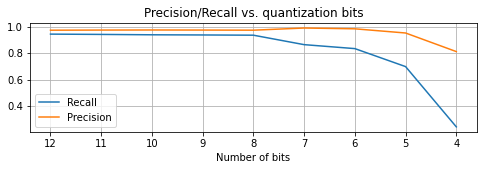

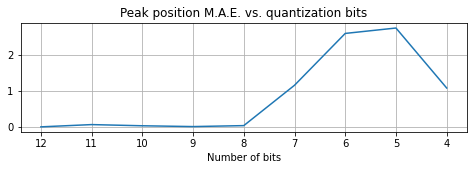

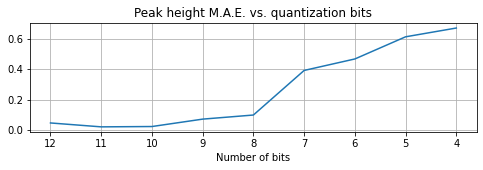

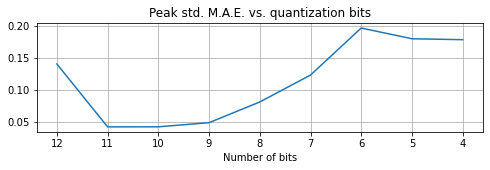

In [6]:
import matplotlib.pyplot as plt

plt.figure( figsize=(8,2))
plt.plot(bits, recalls )
plt.plot(bits, precisions )
plt.gca().invert_xaxis()
plt.title("Precision/Recall vs. quantization bits")
plt.xlabel("Number of bits")
plt.legend( ["Recall","Precision"] )
plt.grid("minor")
plt.savefig( "plots/pr_vs_bits.pdf" )

plt.figure( figsize=(8,2))
plt.plot(bits, position_mae )
plt.gca().invert_xaxis()
plt.title("Peak position M.A.E. vs. quantization bits")
plt.xlabel("Number of bits")
plt.grid("minor")
plt.savefig( "plots/pos_error_vs_bits.pdf" )

plt.figure( figsize=(8,2))
plt.plot(bits, height_mae )
plt.gca().invert_xaxis()
plt.title("Peak height M.A.E. vs. quantization bits")
plt.xlabel("Number of bits")
plt.grid("minor")
plt.savefig( "plots/peak_height_vs_bits.pdf" )

plt.figure( figsize=(8,2))
plt.plot(bits, height_std_mae )
plt.gca().invert_xaxis()
plt.title("Peak std. M.A.E. vs. quantization bits")
plt.xlabel("Number of bits")
plt.grid("minor")
plt.savefig( "plots/peak_std_vs_bits.pdf" )
